In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
import pandas as pd
df_num = pd.read_csv('./df_num.csv')

In [28]:
df_num.columns

Index(['Unnamed: 0', 'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'In_Out', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_

In [29]:
df=df_num[['BeneID','InscClaimAmtReimbursed','IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualDeductibleAmt','PotentialFraud']]

In [30]:
#add new features:
df['IP_OP_TotalReimbursementAmt']=df['IPAnnualReimbursementAmt']+df['OPAnnualReimbursementAmt']
df['IP_OP_AnnualDeductibleAmt']=df['IPAnnualDeductibleAmt']+df['OPAnnualDeductibleAmt']

In [31]:
df.head()

,BeneID,InscClaimAmtReimbursed,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,PotentialFraud,IP_OP_TotalReimbursementAmt,IP_OP_AnnualDeductibleAmt
0,BENE11001,26000,36000,60,3204,70,Yes,36060,3274
1,BENE11001,5000,36000,60,3204,70,No,36060,3274
2,BENE11001,5000,36000,60,3204,70,No,36060,3274
3,BENE11011,5000,5000,250,1068,320,No,5250,1388
4,BENE11014,10000,21260,120,2136,100,No,21380,2236


<AxesSubplot:xlabel='IP_OP_TotalReimbursementAmt', ylabel='InscClaimAmtReimbursed'>

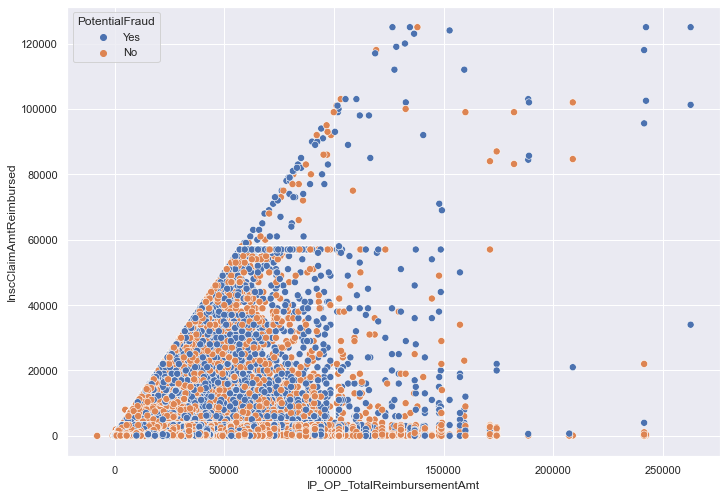

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df,x="IP_OP_TotalReimbursementAmt", y="InscClaimAmtReimbursed",
                hue='PotentialFraud',s=50)

<AxesSubplot:xlabel='IP_OP_AnnualDeductibleAmt', ylabel='InscClaimAmtReimbursed'>

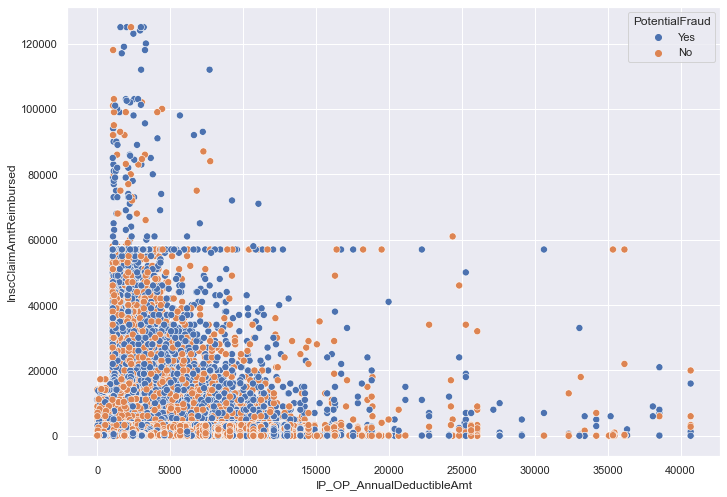

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df,x='IP_OP_AnnualDeductibleAmt', y="InscClaimAmtReimbursed",
                hue='PotentialFraud',s=50)

In [32]:
df.columns

Index(['BeneID', 'InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualDeductibleAmt', 'PotentialFraud',
       'IP_OP_TotalReimbursementAmt', 'IP_OP_AnnualDeductibleAmt'],
      dtype='object')

In [41]:
df['Reim_group']=df['InscClaimAmtReimbursed']//10000

In [52]:
df['total_Reim_group']=df['IP_OP_TotalReimbursementAmt']//10000

In [42]:
df['Reim_group'].sort_values()

279105     0
372134     0
372133     0
372132     0
372131     0
          ..
34034     12
39514     12
4774      12
832       12
20124     12
Name: Reim_group, Length: 558211, dtype: int64

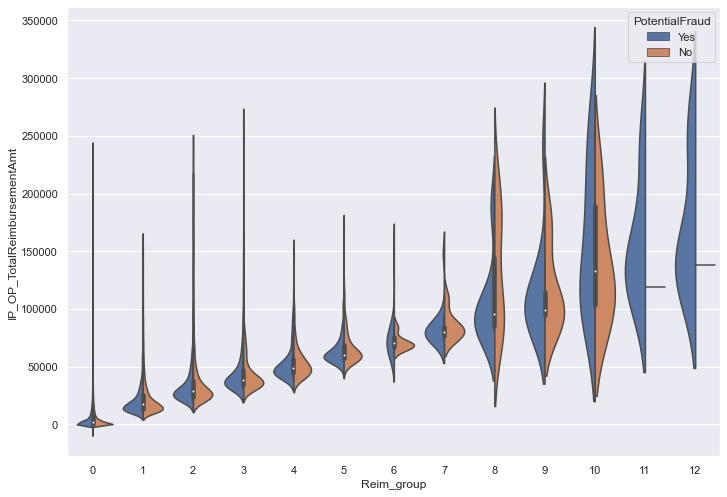

In [46]:
ax=sns.violinplot(x='Reim_group', y='IP_OP_TotalReimbursementAmt', hue='PotentialFraud', 
                   split=True, data=df);



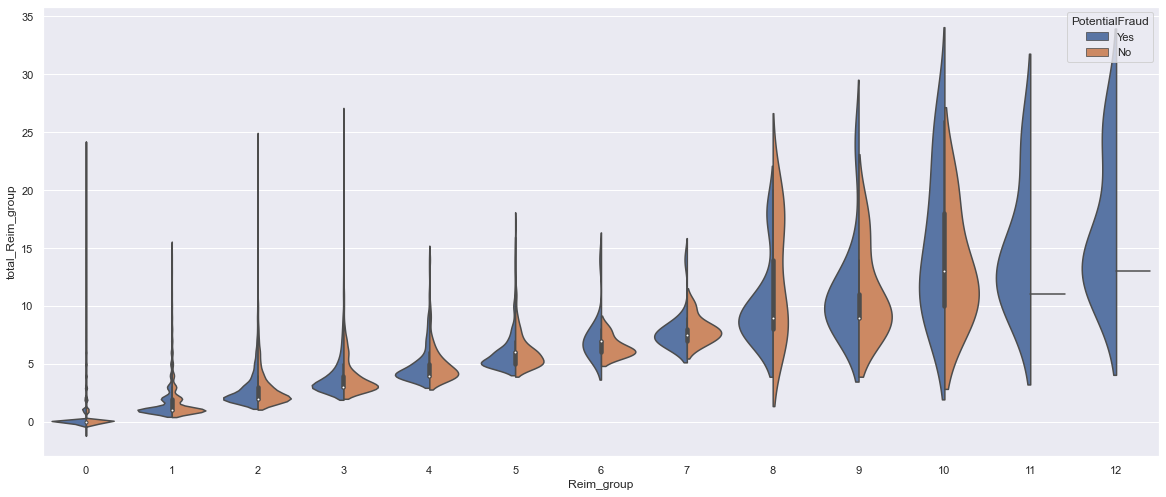

In [54]:
ax=sns.violinplot(x='Reim_group', y='total_Reim_group', hue='PotentialFraud', 
                   split=True, data=df);

<AxesSubplot:xlabel='total_Reim_group', ylabel='Reim_group'>

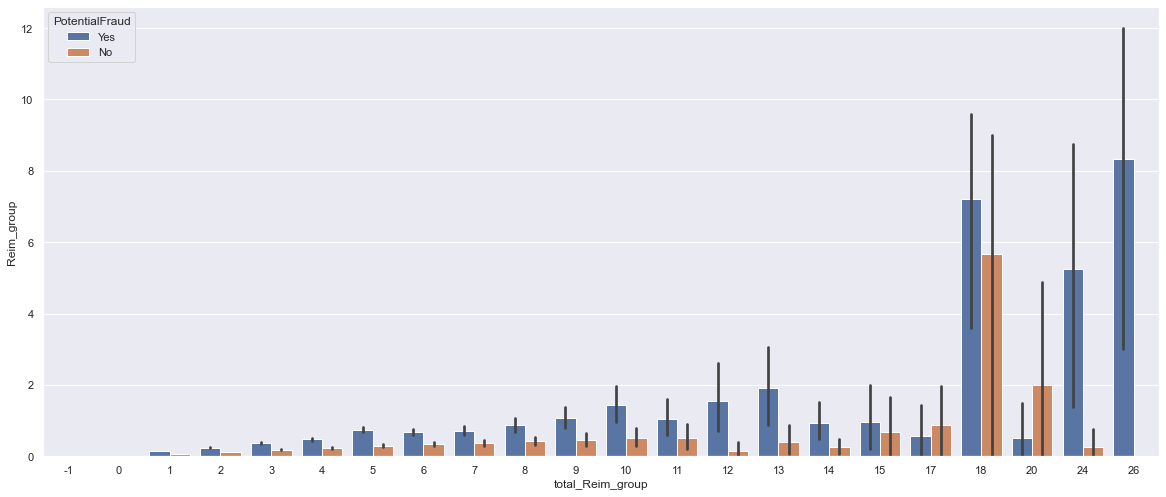

In [53]:
sns.barplot(x='total_Reim_group', y="Reim_group", hue='PotentialFraud', data=df)